# Working with Data blocks

This notebook follows [data block tutorial](https://docs.fast.ai/tutorial.datablock.html) to get familiar with fastai's `DataBlock` api

In [7]:
!pip install -Uqq fastai ipywidgets

The block below makes the notebook properly display fastai's progress in vscode

In [49]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [8]:
from fastai.vision.all import *

In [9]:
path = untar_data(URLs.PETS)/'images'

In [10]:
fnames = get_image_files(path)
fnames

(#7390) [Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/american_bulldog_39.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/boxer_146.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/British_Shorthair_277.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/saint_bernard_132.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/german_shorthaired_193.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Bombay_191.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/pug_28.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Birman_11.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Russian_Blue_80.jpg'),Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_74.jpg')...]

By itself, a DataBlock is just a blue print on how to assemble your data. It does not do anything until you pass it a source. We don't have any instructions on what to do with our data, so we should just get it back as is

In [11]:
dblock = DataBlock()

In [12]:
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Bengal_195.jpg'),
 Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Bengal_195.jpg'))

By default, the data block API assumes we have an input and a target, which is why we see our filename repeated twice.

We can create a datablock that transforms a source path into a list of images:

In [13]:
dblock = DataBlock(get_items=get_image_files)

In [14]:
dsets = dblock.datasets(path)
dsets.train[0]

(Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/scottish_terrier_87.jpg'),
 Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/scottish_terrier_87.jpg'))

The cats in our dataset have filenames beginning with upper case characaters. Otherwise they are dogs

In [15]:
def is_cat(x):
   return x.name[0].isupper()

In [16]:
[(fname, is_cat(fname)) for fname in fnames[:5]]

[(Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/american_bulldog_39.jpg'),
  False),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/boxer_146.jpg'), False),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/British_Shorthair_277.jpg'),
  True),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/saint_bernard_132.jpg'),
  False),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/german_shorthaired_193.jpg'),
  False)]

In [17]:
dblock = DataBlock(get_items=get_image_files, get_y=is_cat)

We should now expect that our dataset has a filename input and boolean target:

In [18]:
dsets = dblock.datasets(path)
dsets.train[:5]

[(Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Sphynx_116.jpg'), True),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/chihuahua_165.jpg'),
  False),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_144.jpg'),
  False),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/boxer_86.jpg'), False),
 (Path('/home/jaym/.fastai/data/oxford-iiit-pet/images/Abyssinian_158.jpg'),
  True)]

Next, we need to transform our input paths into images. To to this, we use ImageBlock:

In [19]:
??ImageBlock

Signature: ImageBlock(cls: 'PILBase' = <class 'fastai.vision.core.PILImage'>)
Source:   
def ImageBlock(cls:PILBase=PILImage):
    "A `TransformBlock` for images of `cls`"
    return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)
File:      ~/.conda/envs/ldm/lib/python3.11/site-packages/fastai/vision/data.py
Type:      function

In [20]:
??TransformBlock

Init signature:
TransformBlock(
    type_tfms: 'list' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    dl_type: 'TfmdDL' = None,
    dls_kwargs: 'dict' = None,
)
Source:        
class TransformBlock():
    "A basic wrapper that links defaults transforms for the data block API"
    def __init__(self, 
        type_tfms:list=None, # One or more `Transform`s
        item_tfms:list=None, # `ItemTransform`s, applied on an item
        batch_tfms:list=None, # `Transform`s or `RandTransform`s, applied by batch
        dl_type:TfmdDL=None, # Task specific `TfmdDL`, defaults to `TfmdDL`
        dls_kwargs:dict=None, # Additional arguments to be passed to `DataLoaders`
    ):
        self.type_tfms  =            L(type_tfms)
        self.item_tfms  = ToTensor + L(item_tfms)
        self.batch_tfms =            L(batch_tfms)
        self.dl_type,self.dls_kwargs = dl_type,({} if dls_kwargs is None else dls_kwargs)
File:           ~/.conda/envs/ldm/lib/python3.11/site-packag

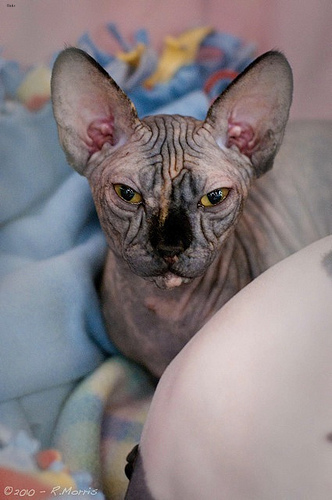

In [21]:
imblock = ImageBlock()
imblock.type_tfms[0](dsets.train[0][0])

In [22]:
dblock = DataBlock(
    blocks=(ImageBlock,None),
    get_items=get_image_files, 
    get_y=is_cat)

In [23]:
dsets = dblock.datasets(path)
dsets.train[:5]

[(PILImage mode=RGB size=375x500, True),
 (PILImage mode=RGB size=500x333, False),
 (PILImage mode=RGB size=500x375, False),
 (PILImage mode=RGB size=500x333, False),
 (PILImage mode=RGB size=294x478, True)]

It looks like we need to do a similar thing for our target variable:

In [24]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    get_y=is_cat)

In [25]:
dsets = dblock.datasets(path)
dsets.train[:5]

[(PILImage mode=RGB size=300x200, TensorCategory(0)),
 (PILImage mode=RGB size=325x500, TensorCategory(1)),
 (PILImage mode=RGB size=332x500, TensorCategory(1)),
 (PILImage mode=RGB size=243x250, TensorCategory(1)),
 (PILImage mode=RGB size=334x500, TensorCategory(0))]

In [26]:
dsets.vocab

[False, True]

We must have a validation set. The DataBlock can create this with the `splitter` argument:

In [27]:
??RandomSplitter

Signature: RandomSplitter(valid_pct=0.2, seed=None)
Source:   
def RandomSplitter(valid_pct=0.2, seed=None):
    "Create function that splits `items` between train/val with `valid_pct` randomly."
    def _inner(o):
        if seed is not None: torch.manual_seed(seed)
        rand_idx = L(list(torch.randperm(len(o)).numpy()))
        cut = int(valid_pct * len(o))
        return rand_idx[cut:],rand_idx[:cut]
    return _inner
File:      ~/.conda/envs/ldm/lib/python3.11/site-packages/fastai/data/transforms.py
Type:      function

The splitter is just a function. fastai provides a `RandomSplitter`, which returns a function that creates a random permutation and splits the data into the 2 sets:

In [28]:
RandomSplitter(seed=42)([i for i in range(10)])

((#8) [1,8,4,5,0,9,3,7], (#2) [2,6])

In [29]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    get_y=is_cat,
    splitter=RandomSplitter(seed=42, valid_pct=0.5))

In [30]:
dsets = dblock.datasets(path)
len(dsets.train),len(dsets.valid)

(3695, 3695)

In [31]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    get_y=is_cat,
    splitter=RandomSplitter(seed=42, valid_pct=0.2))

In [32]:
dsets = dblock.datasets(path)
len(dsets.train),len(dsets.valid)

(5912, 1478)

Now we need to try to get a dataloader. `DataBlock` has a `summary` function of all the transforms its going to try to do:

In [33]:
??dblock.summary

Signature: dblock.summary(source, bs: 'int' = 4, show_batch: 'bool' = False, **kwargs)
Source:   
@patch
def summary(self:DataBlock,
    source, # The data source  
    bs:int=4, # The batch size
    show_batch:bool=False, # Call `show_batch` after the summary
    **kwargs, # Additional keyword arguments to `show_batch`
):
    "Steps through the transform pipeline for one batch, and optionally calls `show_batch(**kwargs)` on the transient `Dataloaders`."
    print(f"Setting-up type transforms pipelines")
    dsets = self.datasets(source, verbose=True)
    print("\nBuilding one sample")
    for tl in dsets.train.tls:
        _apply_pipeline(tl.tfms, get_first(dsets.train.items))
    print(f"\nFinal sample: {dsets.train[0]}\n\n")

    dls = self.dataloaders(source, bs=bs, verbose=True)
    print("\nBuilding one batch")
    if len([f for f in dls.train.after_item.fs if f.name != 'noop'])!=0:
        print("Applying item_tfms to the first sample:")
        s = [_apply_pipeline(dls.train.af

In [35]:
dblock.summary(path, show_batch=True)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jaym/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jaym/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg
    applying is_cat gives
      False
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fal

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 333, 500])
	Item at index 1 has shape: torch.Size([3, 500, 333])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

It wants all the images to be the same size:

In [36]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    get_y=is_cat,
    splitter=RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms=Resize(224))

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jaym/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jaym/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg
    applying is_cat gives
      False
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fal

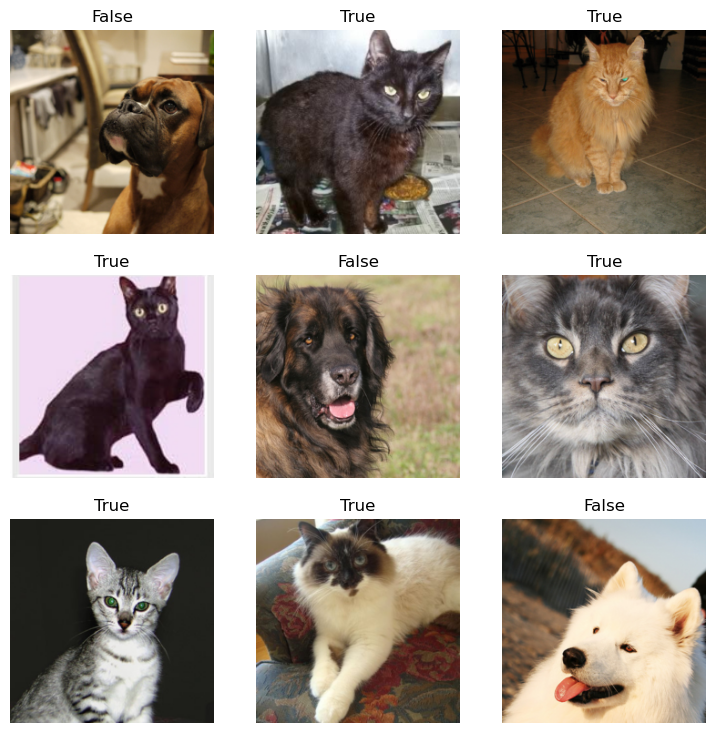

In [37]:
dblock.summary(path, bs=9, show_batch=True)

We can also add `batch_tfms`. One example is augmenting the data with `aug_transforms` to create more different data from the data we have:

In [38]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    get_y=is_cat,
    splitter=RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(max_warp=0.99))

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/jaym/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/jaym/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_115.jpg
    applying is_cat gives
      False
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(0))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_cat -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fal

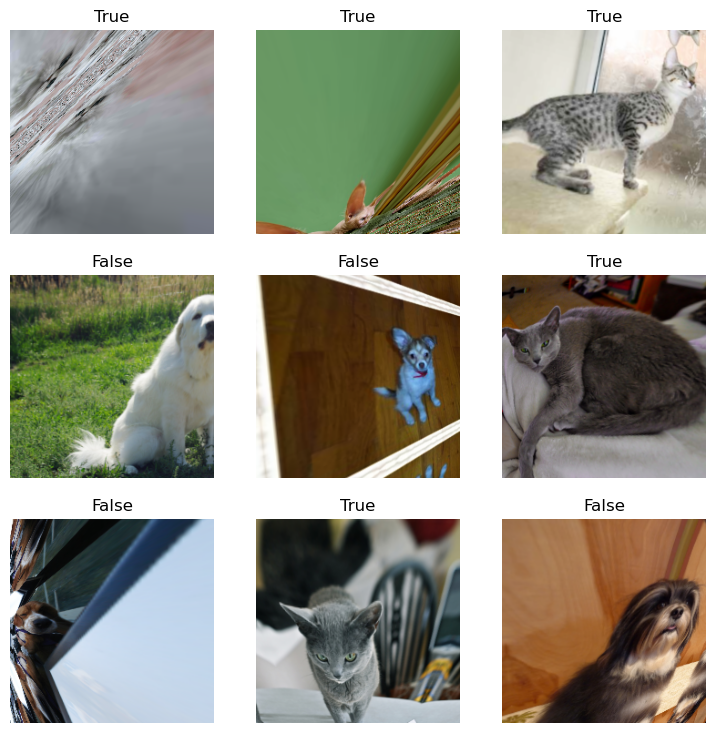

In [39]:
dblock.summary(path, bs=9, show_batch=True)

In [40]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files, 
    get_y=is_cat,
    splitter=RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms())

In [50]:
dls = dblock.dataloaders(path)
learn = vision_learner(dls, resnet34, metrics=[error_rate])

SuggestedLRs(valley=0.0008317637839354575)

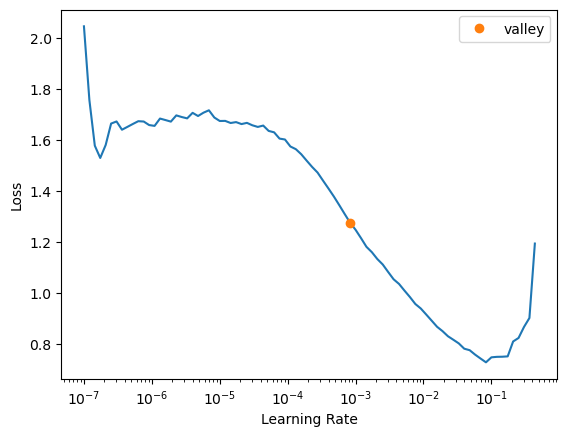

In [51]:
learn.lr_find()

In [53]:
learn.fine_tune(5, 1e-4)

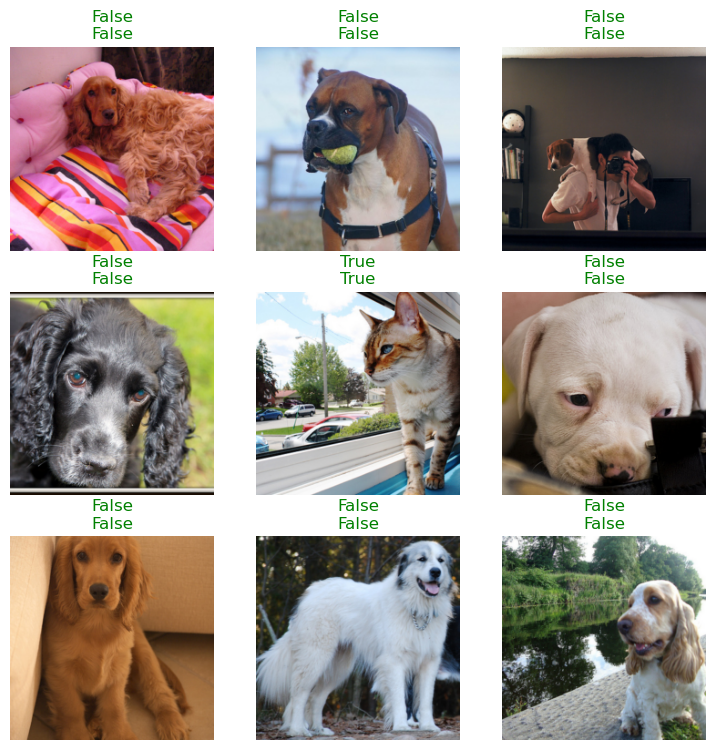

In [47]:
learn.show_results()

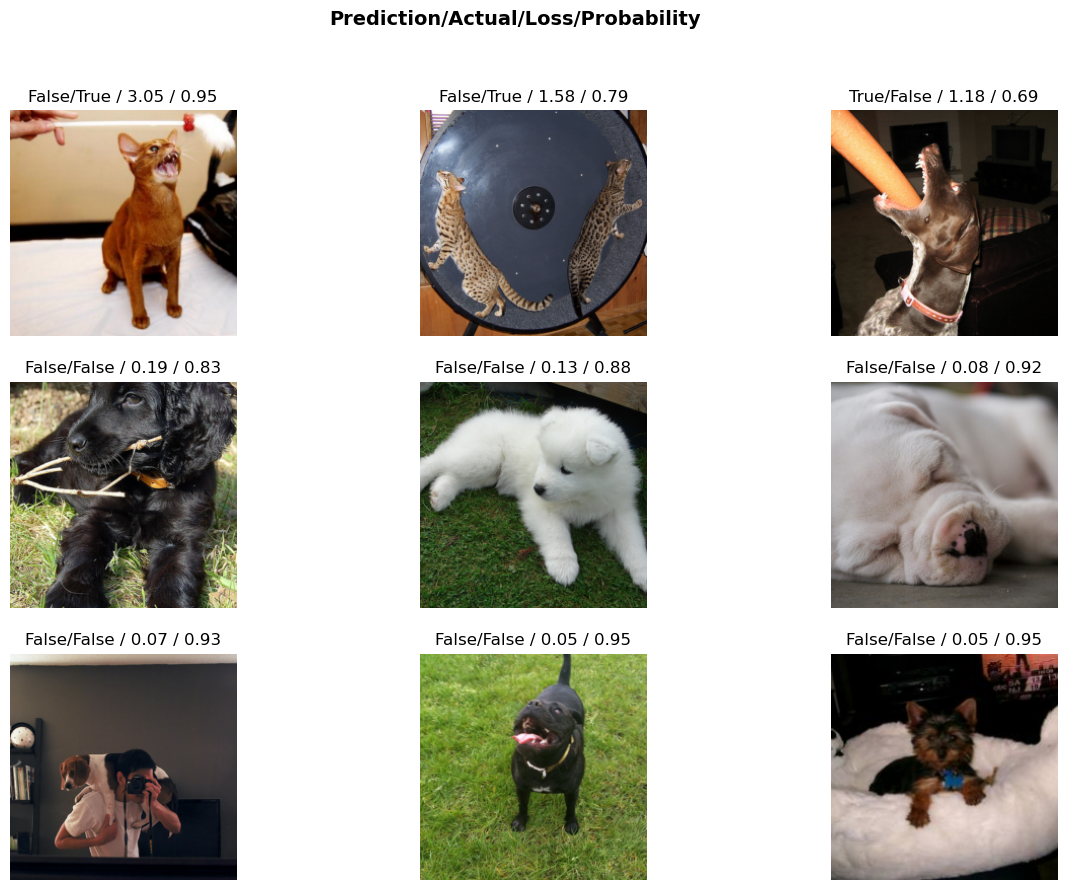

In [48]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
learn.metrics[0]

In [ ]:
learn.fine_tune(2, 5e-4)

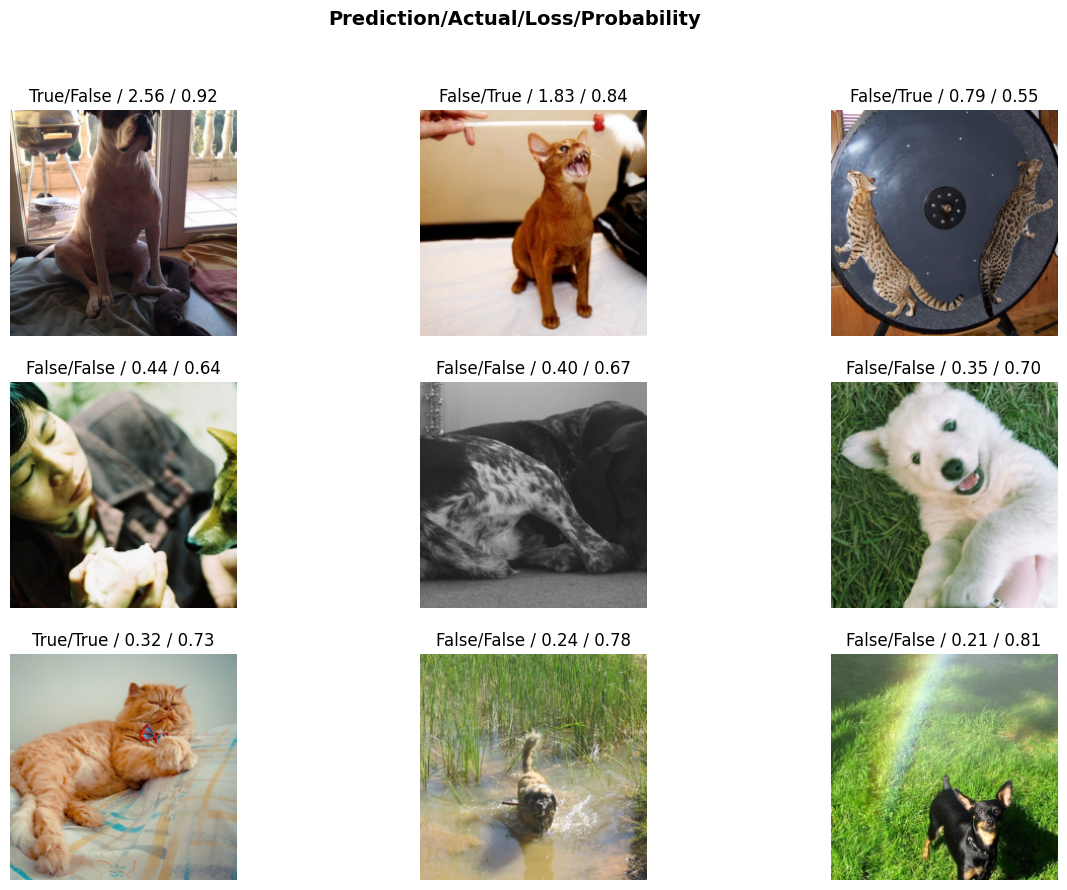

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))